<a href="https://colab.research.google.com/github/MartynaPlomecka/AI4Health/blob/main/Classification_on_spectras_after_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score

import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

# Dataframe preparation

In [188]:
pca95 = pd.read_csv("after_95pca_with6classes.csv", index_col=0)
pca90 = pd.read_csv("after_90pca_with6classes.csv", index_col=0)
pca90

,"('Electrode 63 - 20Hz',)","('Electrode 56 - 16Hz',)","('Electrode 70 - 20Hz',)","('Electrode 75 - 23Hz',)","('Electrode 19 - 46Hz',)","('Electrode 86 - 59Hz',)","('Electrode 60 - 19Hz',)","('Electrode 60 - 16Hz',)","('Electrode 68 - 38Hz',)","('Electrode 57 - 18Hz',)","('Electrode 12 - 19Hz',)","('Electrode 61 - 17Hz',)","('Electrode 74 - 20Hz',)","('Electrode 80 - 18Hz',)","('Electrode 52 - 20Hz',)","('Electrode 43 - 19Hz',)","('Electrode 105 - 19Hz',)","('Electrode 5 - 18Hz',)","('Electrode 103 - 21Hz',)","('Electrode 69 - 21Hz',)","('Electrode 75 - 21Hz',)","('Electrode 46 - 20Hz',)","('Electrode 70 - 15Hz',)","('Electrode 28 - 21Hz',)","('Electrode 78 - 23Hz',)","('Electrode 74 - 24Hz',)","('Electrode 50 - 19Hz',)","('Electrode 38 - 19Hz',)","('Electrode 81 - 19Hz',)","('Electrode 69 - 22Hz',)","('Electrode 47 - 18Hz',)","('Electrode 44 - 18Hz',)","('Electrode 61 - 20Hz',)","('Electrode 50 - 19Hz',).1","('Electrode 53 - 16Hz',)","('Electrode 45 - 10Hz',)","('Electrode 52 - 15Hz',)","('Electrode 77 - 21Hz',)","('Electrode 62 - 22Hz',)","('Electrode 12 - 13Hz',)","('Electrode 88 - 21Hz',)",label
0,-0.430488,-6.731675,-4.867600,3.466962,-2.565753,0.951381,0.479766,-2.068730,-0.683577,1.856075,1.968152,-1.293173,-0.309348,0.023570,0.392498,-1.048182,0.373093,-0.523378,0.566639,0.048809,0.891453,-0.423410,0.340094,0.225677,-1.217761,0.591754,-0.169153,-0.049330,0.619850,0.092936,0.463871,-0.061734,-0.825642,-0.237500,-0.054108,-0.975358,0.346841,0.166131,0.564759,-0.150454,0.146073,No Diagnosis Given
1,-17.713054,4.533371,3.267931,1.522835,3.770185,0.107378,-0.066388,-0.169412,0.750597,-0.908189,1.446781,1.031082,1.012186,0.296521,-1.294421,-1.089174,0.408190,-1.911663,0.277802,0.334726,0.399368,-0.361170,-0.360488,0.234757,-0.384592,0.107894,0.767926,-0.299854,0.292538,-0.009939,-0.368145,0.480584,0.348879,-0.361656,-0.020477,0.359289,0.102560,-0.100110,0.259672,0.073540,0.322806,ADHD-Combined Type
2,6.212079,-4.598784,-2.759346,-0.603485,1.982932,-1.403845,2.336635,-0.930353,2.045150,-0.435429,0.605799,0.506608,-0.988132,-0.425318,0.345815,0.772458,0.565836,-0.197192,-1.255781,1.603978,0.559727,-1.060139,1.269975,0.621092,-0.275001,0.277379,-0.208477,-0.623350,-0.244065,0.278680,-0.979904,-1.129354,0.398249,-0.671549,0.348280,-0.012998,0.049790,0.713386,-0.280496,0.049639,0.466304,ADHD-Combined Type
3,-18.272224,6.246869,4.566977,1.152039,3.510472,0.771874,1.030222,1.789013,-0.576761,0.337159,-0.983822,1.079923,3.034247,0.293650,-1.144630,-0.374233,1.921536,-0.427586,0.856501,1.273742,1.274201,0.325758,-0.252248,0.402914,1.194337,-1.415141,-0.436844,0.891842,0.182427,-1.103693,-0.590641,0.713501,-0.086377,-0.692768,-0.397998,-0.346869,0.083774,0.215296,-0.251399,1.864559,-0.160543,ADHD-Combined Type
4,-7.138505,-7.106939,2.860923,-0.958018,2.691949,0.320327,0.202829,0.729894,0.361163,0.868305,-2.860676,-2.660213,-0.071796,-3.007184,0.380727,1.291302,0.629045,-1.065984,-1.137033,0.117127,-2.241458,-1.672095,-0.470029,0.253124,0.356431,1.753080,-0.710190,0.892850,1.324115,2.634329,-0.809994,-0.999655,-0.373941,0.622996,-0.216144,1.257985,1.058595,1.380546,-0.309880,-0.060505,-0.332363,ADHD-Combined Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,4.133225,-6.185843,-5.799242,3.364663,-1.863835,-1.141451,-1.854677,0.557059,-1.221169,1.854056,2.606057,0.228210,-1.275783,-0.887432,0.342317,2.217618,2.573386,-0.622527,-0.972247,0.393518,1.542538,0.104754,0.827151,-0.036278,0.603921,0.194811,-1.012958,-1.868571,-1.079420,-0.445645,1.272063,0.063680,1.086536,-0.595586,-0.252958,0.160998,2.448878,0.368648,0.409660,-0.166022,0.530135,Anxiety Disorders
1781,1.995004,1.462088,3.130046,5.061500,6.401234,1.440965,-1.260470,0.794055,0.239392,0.302354,2.298307,0.968321,3.024263,1.307116,-1.996898,1.204854,1.781360,-0.822647,1.239425,-1.823549,0.050253,-0.361485,-0.673204,0.044502,-0.616130,0.911581,-1.249943,

In [149]:
pca90.label.unique()

array(['No Diagnosis Given', 'ADHD-Combined Type', 'Depressive Disorders',
       'ADHD-Inattentive Type', 'Other Neurodevelopmental Disorders',
       'Anxiety Disorders'], dtype=object)

# Start with classification, first on 90% variance retained from the orginal power spectra dataset

In [189]:
print(list(pca90.columns[0: 41]))


["('Electrode 63 - 20Hz',)", "('Electrode 56 - 16Hz',)", "('Electrode 70 - 20Hz',)", "('Electrode 75 - 23Hz',)", "('Electrode 19 - 46Hz',)", "('Electrode 86 - 59Hz',)", "('Electrode 60 - 19Hz',)", "('Electrode 60 - 16Hz',)", "('Electrode 68 - 38Hz',)", "('Electrode 57 - 18Hz',)", "('Electrode 12 - 19Hz',)", "('Electrode 61 - 17Hz',)", "('Electrode 74 - 20Hz',)", "('Electrode 80 - 18Hz',)", "('Electrode 52 - 20Hz',)", "('Electrode 43 - 19Hz',)", "('Electrode 105 - 19Hz',)", "('Electrode 5 - 18Hz',)", "('Electrode 103 - 21Hz',)", "('Electrode 69 - 21Hz',)", "('Electrode 75 - 21Hz',)", "('Electrode 46 - 20Hz',)", "('Electrode 70 - 15Hz',)", "('Electrode 28 - 21Hz',)", "('Electrode 78 - 23Hz',)", "('Electrode 74 - 24Hz',)", "('Electrode 50 - 19Hz',)", "('Electrode 38 - 19Hz',)", "('Electrode 81 - 19Hz',)", "('Electrode 69 - 22Hz',)", "('Electrode 47 - 18Hz',)", "('Electrode 44 - 18Hz',)", "('Electrode 61 - 20Hz',)", "('Electrode 50 - 19Hz',).1", "('Electrode 53 - 16Hz',)", "('Electrode 45 

In [190]:
### here the features and labels:
X = pca90.iloc[:, 0: 41].to_numpy()
y = pca90['label'].to_numpy()


## Dealing with inbalanced dataset:

In [191]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({'Other Neurodevelopmental Disorders': 492, 'ADHD-Inattentive Type': 388, 'ADHD-Combined Type': 376, 'Anxiety Disorders': 241, 'No Diagnosis Given': 203, 'Depressive Disorders': 85})


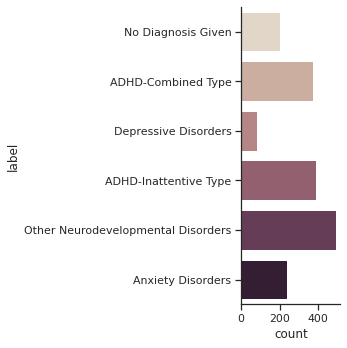

In [177]:
sns.catplot(y="label", kind="count", palette="ch:.25", data=pca90)

In [192]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)


In [197]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_val, y_val = oversample.fit_resample(X_val, y_val)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'Other Neurodevelopmental Disorders': 397, 'ADHD-Inattentive Type': 397, 'Anxiety Disorders': 397, 'ADHD-Combined Type': 397, 'Depressive Disorders': 397, 'No Diagnosis Given': 397})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

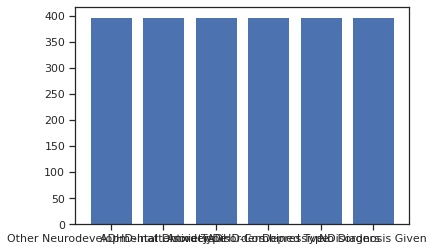

In [194]:
#summarize the oversampled distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Cost-Sensitive Learning for Multi-Class Classification


In [ ]:
# cost sensitive random forest with default class weights
#naive baseline = 0.16666
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.636 (0.013)


# Classification,on 95% variance retained from the orginal power spectra dataset

In [201]:
### here the features and labels:
X = pca95.iloc[:, 0: 132].to_numpy()
y = pca95['label'].to_numpy()

In [202]:
# cost sensitive random forest with default class weights
#naive baseline = 0.16666
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.268 (0.010)


In [130]:
X = pca90.iloc[:, 0: 41].to_numpy()
y = pca90['label'].to_numpy()

## Random forests

In [203]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)

clf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

clf.fit(X_train, y_train)
preds = clf.predict(X_val)

print('accuracy', accuracy_score(y_val, preds))
print(confusion_matrix(y_val, preds))
print(classification_report(y_val, preds))

accuracy 0.22807017543859648
[[22 21 11  5  3 33]
 [18 20 12  1  9 35]
 [22 17 19  4  6 27]
 [17 13 15 19  7 24]
 [24 24  7  7  9 24]
 [17 17 11  2  7 41]]
                                    precision    recall  f1-score   support

                ADHD-Combined Type       0.18      0.23      0.20        95
             ADHD-Inattentive Type       0.18      0.21      0.19        95
                 Anxiety Disorders       0.25      0.20      0.22        95
              Depressive Disorders       0.50      0.20      0.29        95
                No Diagnosis Given       0.22      0.09      0.13        95
Other Neurodevelopmental Disorders       0.22      0.43      0.29        95

                          accuracy                           0.23       570
                         macro avg       0.26      0.23      0.22       570
                      weighted avg       0.26      0.23      0.22       570



## SVC

In [204]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)

clf = SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_val)
val_acc = accuracy_score(y_val, preds)
val_bal_acc = balanced_accuracy_score(y_val, preds)

print('accuracy', accuracy_score(y_val, preds))
print('balanced accuracy',val_bal_acc)

print(confusion_matrix(y_val, preds))
print(classification_report(y_val, preds))

accuracy 0.25087719298245614
balanced accuracy 0.25087719298245614
[[30 14 11  7 14 19]
 [19 23 12 10 13 18]
 [18 28 18 14 10  7]
 [16  6  6 44  7 16]
 [21 19 17 12 14 12]
 [24 12 21  6 18 14]]
                                    precision    recall  f1-score   support

                ADHD-Combined Type       0.23      0.32      0.27        95
             ADHD-Inattentive Type       0.23      0.24      0.23        95
                 Anxiety Disorders       0.21      0.19      0.20        95
              Depressive Disorders       0.47      0.46      0.47        95
                No Diagnosis Given       0.18      0.15      0.16        95
Other Neurodevelopmental Disorders       0.16      0.15      0.15        95

                          accuracy                           0.25       570
                         macro avg       0.25      0.25      0.25       570
                      weighted avg       0.25      0.25      0.25       570




## Cost sensitive random forest with default class weights

In [200]:
# cost sensitive random forest with default class weights
#naive baseline = 0.16666
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.270 (0.014)
